In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS=70

In [3]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "Data",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)
    


Found 3507 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['pest_test', 'pest_train', 'uploaded']

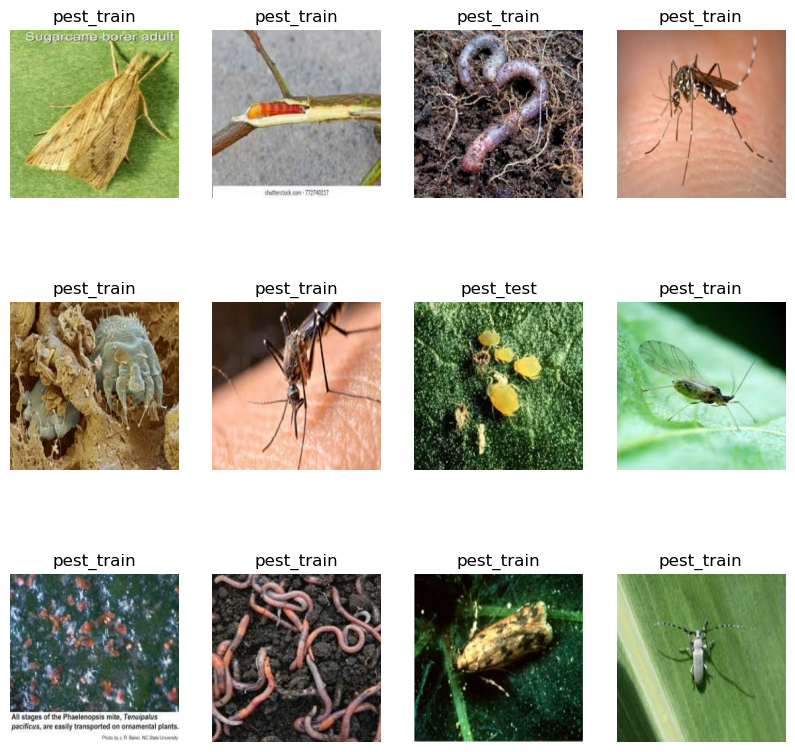

In [5]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [6]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "pest_train",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)
    


Found 3001 files belonging to 10 classes.


In [7]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "pest_test",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)
    


Found 500 files belonging to 10 classes.


In [8]:
class_names = train_ds.class_names
class_names

['aphids',
 'armyworm',
 'beetle',
 'bollworm',
 'earthworm',
 'grasshopper',
 'mites',
 'mosquito',
 'sawfly',
 'stem_borer']

In [9]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


In [10]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [11]:
data_augumentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [12]:
input_shape=(BATCH_SIZE,IMAGE_SIZE , IMAGE_SIZE, CHANNELS)
n_classes = 10
model = models.Sequential([
    resize_and_rescale,
    data_augumentation,
    layers.Conv2D(32, (3,3) , activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3) , activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3) , activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3) , activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3) , activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3) , activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
    
])

model.build(input_shape=input_shape)

In [13]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [14]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [15]:
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data = test_ds
)

Epoch 1/70
94/94 [==============================] - 591s 6s/step - loss: 2.2307 - accuracy: 0.1509 - val_loss: 2.1568 - val_accuracy: 0.2080
Epoch 2/70
94/94 [==============================] - 520s 6s/step - loss: 2.1640 - accuracy: 0.2136 - val_loss: 2.0485 - val_accuracy: 0.2200
Epoch 3/70
94/94 [==============================] - 507s 5s/step - loss: 2.0645 - accuracy: 0.2459 - val_loss: 2.0436 - val_accuracy: 0.2600
Epoch 4/70
94/94 [==============================] - 414s 4s/step - loss: 1.9855 - accuracy: 0.2822 - val_loss: 1.8704 - val_accuracy: 0.3120
Epoch 5/70
94/94 [==============================] - 99s 1s/step - loss: 1.9185 - accuracy: 0.2909 - val_loss: 1.8869 - val_accuracy: 0.3180
Epoch 6/70
94/94 [==============================] - 98s 1s/step - loss: 1.8228 - accuracy: 0.3386 - val_loss: 1.7233 - val_accuracy: 0.3640
Epoch 7/70
94/94 [==============================] - 163s 2s/step - loss: 1.7860 - accuracy: 0.3585 - val_loss: 1.7647 - val_accuracy: 0.3620
Epoch 8/70
94/9

Epoch 59/70
94/94 [==============================] - 139s 1s/step - loss: 0.1559 - accuracy: 0.9410 - val_loss: 0.7840 - val_accuracy: 0.8840
Epoch 60/70
94/94 [==============================] - 137s 1s/step - loss: 0.2232 - accuracy: 0.9190 - val_loss: 0.7919 - val_accuracy: 0.8640
Epoch 61/70
94/94 [==============================] - 140s 1s/step - loss: 0.2361 - accuracy: 0.9154 - val_loss: 0.6476 - val_accuracy: 0.8940
Epoch 62/70
94/94 [==============================] - 140s 1s/step - loss: 0.1685 - accuracy: 0.9400 - val_loss: 0.7605 - val_accuracy: 0.8880
Epoch 63/70
94/94 [==============================] - 488s 5s/step - loss: 0.1975 - accuracy: 0.9257 - val_loss: 0.7548 - val_accuracy: 0.8720
Epoch 64/70
94/94 [==============================] - 481s 5s/step - loss: 0.2275 - accuracy: 0.9207 - val_loss: 0.7487 - val_accuracy: 0.8800
Epoch 65/70
94/94 [==============================] - 411s 4s/step - loss: 0.2489 - accuracy: 0.9057 - val_loss: 0.6801 - val_accuracy: 0.8900
Epoch 

In [16]:
scores=model.evaluate(test_ds)

16/16 [==============================] - 15s 968ms/step - loss: 0.7130 - accuracy: 0.8900


In [17]:
history

In [18]:
history.params

{'verbose': 1, 'epochs': 70, 'steps': 94}

In [19]:
history.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

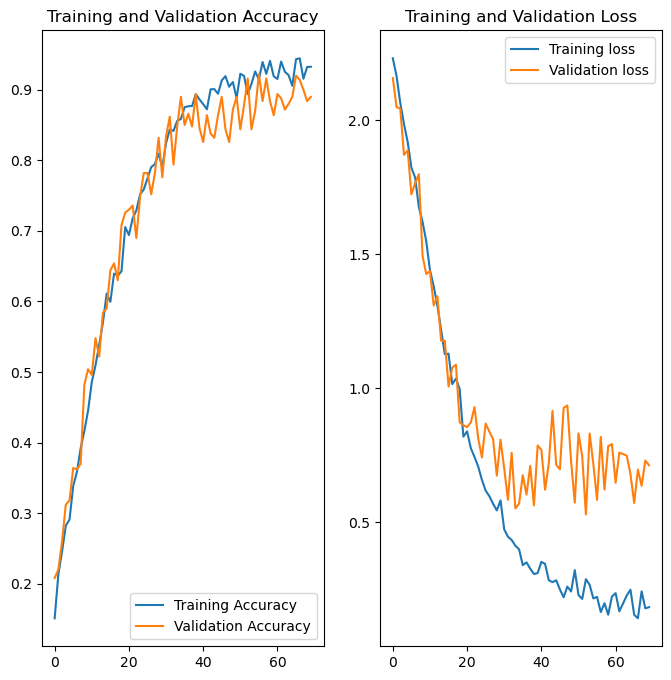

In [21]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label='Training loss')
plt.plot(range(EPOCHS), val_loss, label='Validation loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
first image's actual label :  aphids
1/1 [==============================] - 1s 1s/step
Predicted Label:  aphids


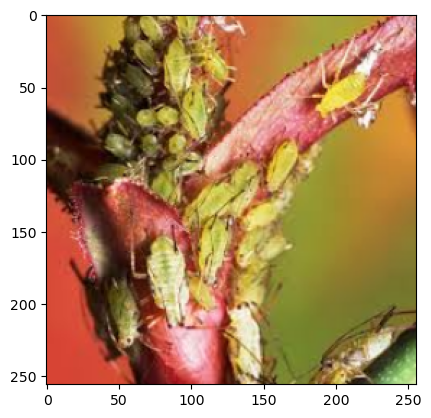

In [22]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0]
    print("first image to predict")
    plt.imshow(first_image)
    print("first image's actual label : ",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("Predicted Label: " ,class_names[np.argmax(batch_prediction[0])])

first image to predict
first image's actual label :  bollworm
1/1 [==============================] - 0s 462ms/step
Predicted Label:  bollworm


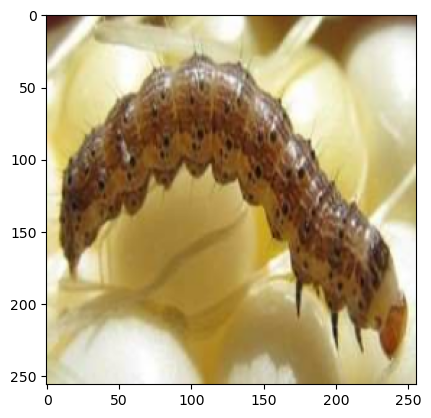

In [23]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0]
    print("first image to predict")
    plt.imshow(first_image)
    print("first image's actual label : ",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("Predicted Label: " ,class_names[np.argmax(batch_prediction[0])])

In [24]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])),2)
    return predicted_class, confidence

1/1 [==============================] - 0s 62ms/step


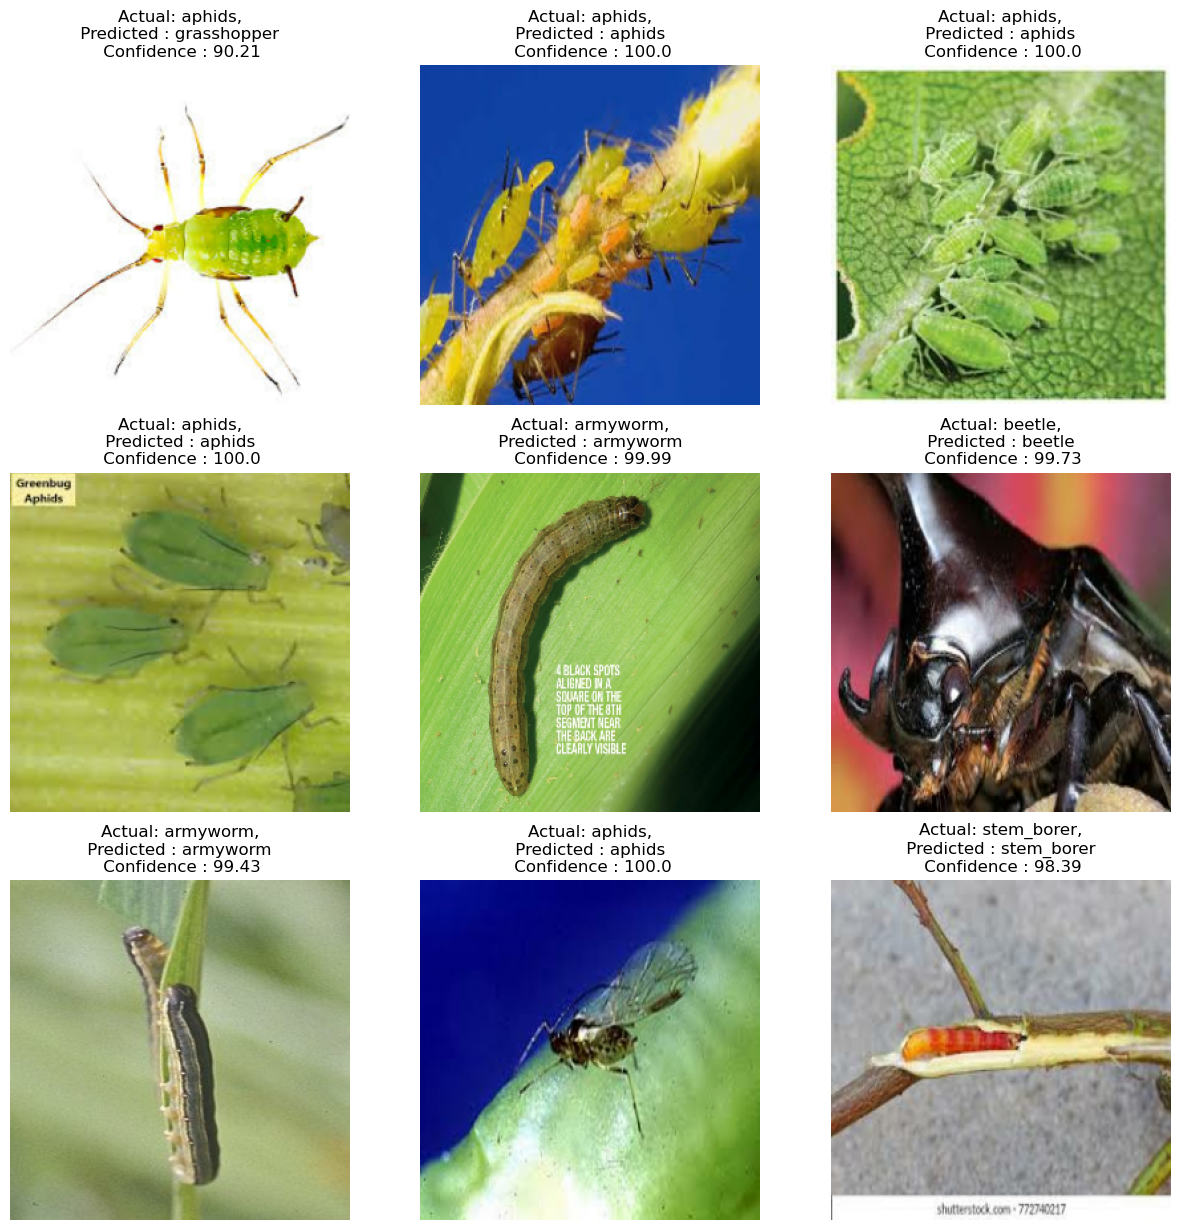

In [25]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual: {actual_class},\n Predicted : {predicted_class} \n Confidence : {confidence}")
        plt.axis("off")

In [26]:
model_version=3
model.save(f"./models/{model_version}")

INFO:tensorflow:Assets written to: ./models/3\assets


INFO:tensorflow:Assets written to: ./models/3\assets
